## Algoritmos de Aprendizaje automático utilizados

Una vez que hayamos definido el problema y preparado los datos, debemos aplicar algoritmos de aprendizaje automático a los datos para intentar ofrecer una solución eficiente.
Al tratarse de un problema de clasificación, orientaremos la elección de algoritmos utilizados hacia esa rama del Machine Learning. Aplicaremos los siguientes algoritmos: (Scikit-Learn, 2020)

## Voting Classifiers

#### Explicación del Voting Classifiers

Tomemos un ejemplo simple para ilustrar cómo funcionan ambos enfoques.

Imagine que tiene 3 clasificadores (1, 2, 3) y dos clases (A, B), y después del entrenamiento predice la clase de un solo punto.

----------------------------------------------------------------

**Voting Classifiers "Hard":**

Predicciones:

  -  El clasificador 1 predice la clase A

  -  El clasificador 2 predice la clase B

  -  El clasificador 3 predice la clase B

**Los clasificadores 2/3 predicen la clase B, por lo que la clase B es la decisión del conjunto.**

--------------------------------------------------------------------

**Voting Classifiers "Soft":**

Predicciones

(Esto es idéntico al ejemplo anterior, pero ahora se expresa en términos de probabilidades. Los valores se muestran solo para la clase A aquí porque el problema es binario):

   - El clasificador 1 predice la clase A con una probabilidad del 99%

   - El clasificador 2 predice la clase A con una probabilidad del 49%

   - El clasificador 3 predice la clase A con una probabilidad del 49%

**La probabilidad promedio de pertenecer a la clase A entre los clasificadores es (99 + 49 + 49) / 3 = 65.67%. Por lo tanto, la clase A es la decisión del conjunto.**

In [1]:
# Importamos las librerías necesarias

import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import xgboost as xgb

# Representaciones graficas locales

%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

# Obviamos los errores de actualización 

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

# Ponemos la semilla
np.random.seed(0)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importamos la función de limpieza y preprocesado de datos
import frauddef # con solo las variables de research

In [3]:
# Importamos el dataset 
df = pd.read_csv('Explor_uscecchini28.csv')

In [4]:
# Establecemos las variables X e Y
X_train_nm, X_test_nm, y_train_nm, y_test_nm, X_train_sm, X_test_sm, y_train_sm, y_test_sm = frauddef.limpieza(df)

Using TensorFlow backend.


In [5]:
# Escalamos las variables con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_nm = scaler.fit_transform(X_train_nm)
X_test_nm  = scaler.transform(X_test_nm)

##### Hard Voting Classifier 1

In [6]:
# Construcción de los modelos: LogisticRegression, RandomForestClassifier y DecisionTreeClassifier.

lr_hard = LogisticRegression()
lr_hard.fit(X_train_nm, y_train_nm)
RandomForestClassifier_hard = RandomForestClassifier()
RandomForestClassifier_hard.fit(X_train_nm, y_train_nm)
dt_hard = DecisionTreeClassifier()
dt_hard.fit(X_train_nm, y_train_nm)

# Ajuste del sistema de votación, especificamos que el método de votación será "Hard"
estimators_hard_2 = [('lr', lr_hard), ('rf', RandomForestClassifier_hard), 
                                               ('dt', dt_hard)]

voting_clf_hard = VotingClassifier(estimators= estimators_hard_2,  voting='hard')
voting_clf_hard.fit(X_train_nm, y_train_nm)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())])

- Nombre del Modelo: LogisticRegression 
 
 - Precisión: 0.7755102040816326 | 
 - Exactitud: 0.9411764705882353 | 
 - Exhaustividad: 0.6153846153846154 | 
 - F1: 0.744186046511628 | 
 - AUC: 0.7859531772575251 |
 
 - Matriz de confusion: 
 [[22  1]
 [10 16]] 

- Nombre del Modelo: RandomForestClassifier 
 
 - Precisión: 1.0 | 
 - Exactitud: 1.0 | 
 - Exhaustividad: 1.0 | 
 - F1: 1.0 | 
 - AUC: 1.0 |
 
 - Matriz de confusion: 
 [[23  0]
 [ 0 26]] 

- Nombre del Modelo: DecisionTreeClassifier 
 
 - Precisión: 0.9795918367346939 | 
 - Exactitud: 1.0 | 
 - Exhaustividad: 0.9615384615384616 | 
 - F1: 0.9803921568627451 | 
 - AUC: 0.9807692307692308 |
 
 - Matriz de confusion: 
 [[23  0]
 [ 1 25]] 

- Nombre del Modelo: VotingClassifier 
 
 - Precisión: 0.9795918367346939 | 
 - Exactitud: 1.0 | 
 - Exhaustividad: 0.9615384615384616 | 
 - F1: 0.9803921568627451 | 
 - AUC: 0.9807692307692308 |
 
 - Matriz de confusion: 
 [[23  0]
 [ 1 25]] 



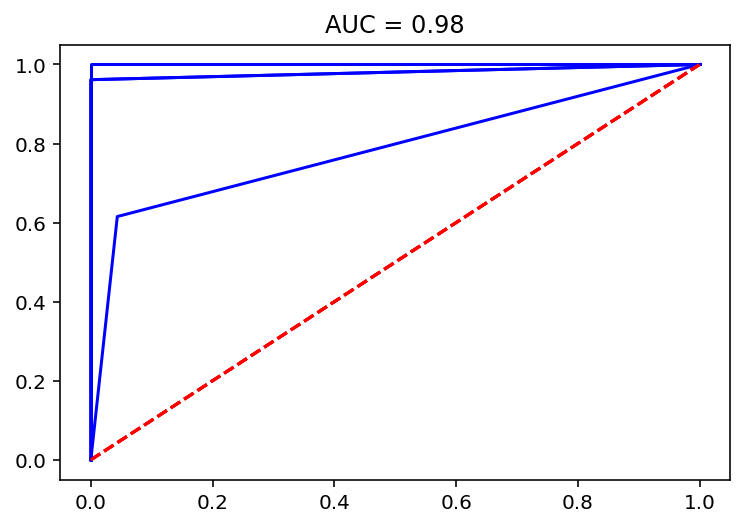

In [7]:
# Medicion del rendimiento de los modelos; exactitud, exhaustividad, F1, Auc y matriz de confusión.

for clf in (lr_hard, RandomForestClassifier_hard, dt_hard, voting_clf_hard):
    clf.fit(X_train_nm, y_train_nm)
    y_test_pred = clf.predict(X_test_nm)
    y_train_pred = clf.predict(X_train_nm)
    cm = confusion_matrix(y_test_nm, y_test_pred)
    false_positive_rate, recall, thresholds = roc_curve(y_test_nm, y_test_pred) # el area bajo la curva
    roc_auc = auc(false_positive_rate, recall)
    
    print("- Nombre del Modelo: {} \n" .format(clf.__class__.__name__) , "\n - Precisión: {} |" 
          .format(accuracy_score(y_test_nm, y_test_pred)), 
          "\n - Exactitud: {} |" .format(precision_score(y_test_nm, y_test_pred)), 
          "\n - Exhaustividad: {} |" .format(recall_score(y_test_nm, y_test_pred)), 
          "\n - F1: {} |" .format(f1_score(y_test_nm, y_test_pred)), 
          "\n - AUC: {} |\n" .format(auc(false_positive_rate, recall)),
          "\n - Matriz de confusion: \n {} \n" .format(cm))
    
    # Representamos gráficamente AUC
    plot(false_positive_rate, recall, 'b') # imprimir el ratio
    plot([0, 1], [0, 1], 'r--') # difinir el ratio entre 0 y 1
    title('AUC = %0.2f' % roc_auc)


#### Observación 

En esta votación, vemos que el mejor modelo es el de **”Random Forest Classifier ”** con una precisión del **100 %**

---------------------------------------------

-----------------------------------------------
####  Random Forest Classifier Feature Importance

Como el mejor modelo es el de **”Random Forest Classifier”**, vamos a ver que variables son las que tienen mayor impacto en la predicción. Usaremos **"Feature Importance"**

Feature: 0, Score: 0.10197
Feature: 1, Score: 0.03906
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01386
Feature: 5, Score: 0.10143
Feature: 6, Score: 0.10024
Feature: 7, Score: 0.02237
Feature: 8, Score: 0.04548
Feature: 9, Score: 0.11172
Feature: 10, Score: 0.02336
Feature: 11, Score: 0.00705
Feature: 12, Score: 0.04170
Feature: 13, Score: 0.00423
Feature: 14, Score: 0.00282
Feature: 15, Score: 0.00205
Feature: 16, Score: 0.05079
Feature: 17, Score: 0.03954
Feature: 18, Score: 0.00603
Feature: 19, Score: 0.00817
Feature: 20, Score: 0.01008
Feature: 21, Score: 0.00713
Feature: 22, Score: 0.02950
Feature: 23, Score: 0.05561
Feature: 24, Score: 0.00454
Feature: 25, Score: 0.01026
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00260
Feature: 28, Score: 0.03822
Feature: 29, Score: 0.04943
Feature: 30, Score: 0.02081
Feature: 31, Score: 0.00771
Feature: 32, Score: 0.00443
Feature: 33, Score: 0.02700
Feature: 34, Score: 0.01080


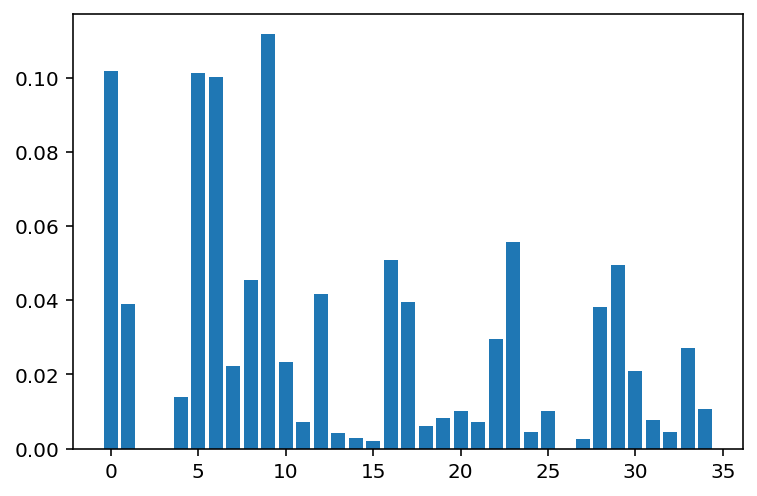

In [8]:
importance = RandomForestClassifier_hard.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [9]:
# Fijamos los valores de los distintos medidores de rendimiento para usarlos en una tabla comparativa. 

report_table_1 = ['Hard Voting Classifier', '',accuracy_score(y_train_nm, y_train_pred), 
                  accuracy_score(y_test_nm, y_test_pred), recall_score(y_test_nm, y_test_pred),
                 f1_score(y_test_nm, y_test_pred), auc(false_positive_rate, recall)]

##### Soft Voting Classifier 1

In [10]:
# Construcción de los modelos: LogisticRegression, RandomForestClassifier y DecisionTreeClassifier.

lr_soft = LogisticRegression()
lr_soft.fit(X_train_nm, y_train_nm)
RandomForestClassifier_soft = RandomForestClassifier()
RandomForestClassifier_soft.fit(X_train_nm, y_train_nm)
dt_soft = DecisionTreeClassifier()
dt_soft.fit(X_train_nm, y_train_nm)


# Ajuste del sistema de votación, especificamos que el método de votación será "Soft"
estimators_soft_2 = [('lr', lr_soft), ('rf', RandomForestClassifier_soft), ('dt', dt_soft)]

voting_clf_soft = VotingClassifier(estimators= estimators_soft_2, voting='soft')
voting_clf_soft.fit(X_train_nm, y_train_nm)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

- Nombre del Modelo: LogisticRegression 
 
 - Precisión: 0.7755102040816326 | 
 - Exactitud: 0.9411764705882353 | 
 - Exhaustividad: 0.6153846153846154 | 
 - F1: 0.744186046511628 | 
 - AUC: 0.7859531772575251 |
 
 - Matriz de confusion: 
 [[22  1]
 [10 16]] 

- Nombre del Modelo: RandomForestClassifier 
 
 - Precisión: 1.0 | 
 - Exactitud: 1.0 | 
 - Exhaustividad: 1.0 | 
 - F1: 1.0 | 
 - AUC: 1.0 |
 
 - Matriz de confusion: 
 [[23  0]
 [ 0 26]] 

- Nombre del Modelo: DecisionTreeClassifier 
 
 - Precisión: 0.9591836734693877 | 
 - Exactitud: 1.0 | 
 - Exhaustividad: 0.9230769230769231 | 
 - F1: 0.9600000000000001 | 
 - AUC: 0.9615384615384616 |
 
 - Matriz de confusion: 
 [[23  0]
 [ 2 24]] 

- Nombre del Modelo: VotingClassifier 
 
 - Precisión: 0.9591836734693877 | 
 - Exactitud: 0.9615384615384616 | 
 - Exhaustividad: 0.9615384615384616 | 
 - F1: 0.9615384615384616 | 
 - AUC: 0.9590301003344482 |
 
 - Matriz de confusion: 
 [[22  1]
 [ 1 25]] 



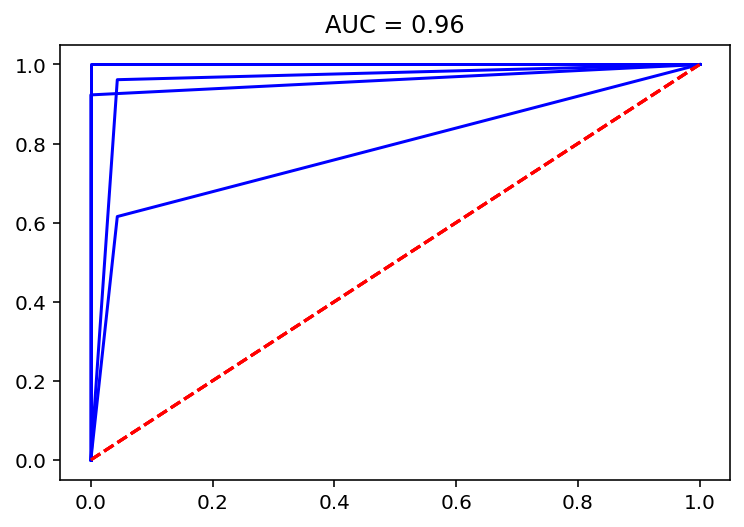

In [11]:
# Medicion del rendimiento de los modelos; exactitud, exhaustividad, F1, Auc y matriz de confusión.

for clf in (lr_soft, RandomForestClassifier_soft, dt_soft, voting_clf_soft):
    clf.fit(X_train_nm, y_train_nm)
    y_test_pred = clf.predict(X_test_nm)
    y_train_pred = clf.predict(X_train_nm)
    cm = confusion_matrix(y_test_nm, y_test_pred)
    false_positive_rate, recall, thresholds = roc_curve(y_test_nm, y_test_pred) # el area bajo la curva
    roc_auc = auc(false_positive_rate, recall)
    
    print("- Nombre del Modelo: {} \n" .format(clf.__class__.__name__) , "\n - Precisión: {} |" 
          .format(accuracy_score(y_test_nm, y_test_pred)), 
          "\n - Exactitud: {} |" .format(precision_score(y_test_nm, y_test_pred)), 
          "\n - Exhaustividad: {} |" .format(recall_score(y_test_nm, y_test_pred)), 
          "\n - F1: {} |" .format(f1_score(y_test_nm, y_test_pred)), 
          "\n - AUC: {} |\n" .format(auc(false_positive_rate, recall)),
          "\n - Matriz de confusion: \n {} \n" .format(cm))
    
    # Representamos gráficamente AUC
    plot(false_positive_rate, recall, 'b') # imprimir el ratio
    plot([0, 1], [0, 1], 'r--') # difinir el ratio entre 0 y 1
    title('AUC = %0.2f' % roc_auc)

In [12]:
# Fijamos los valores de los distintos medidores de rendimiento para usarlos en una tabla comparativa. 

report_table_2 = ['Soft Voting Classifier', '',accuracy_score(y_train_nm, y_train_pred), 
                  accuracy_score(y_test_nm, y_test_pred), recall_score(y_test_nm, y_test_pred),
                 f1_score(y_test_nm, y_test_pred), auc(false_positive_rate, recall)]

Feature: 0, Score: 0.08441
Feature: 1, Score: 0.03859
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01636
Feature: 5, Score: 0.11628
Feature: 6, Score: 0.11669
Feature: 7, Score: 0.06570
Feature: 8, Score: 0.05382
Feature: 9, Score: 0.08620
Feature: 10, Score: 0.05231
Feature: 11, Score: 0.00361
Feature: 12, Score: 0.02637
Feature: 13, Score: 0.01673
Feature: 14, Score: 0.00707
Feature: 15, Score: 0.00105
Feature: 16, Score: 0.01566
Feature: 17, Score: 0.02803
Feature: 18, Score: 0.00687
Feature: 19, Score: 0.00356
Feature: 20, Score: 0.01513
Feature: 21, Score: 0.00445
Feature: 22, Score: 0.02243
Feature: 23, Score: 0.04646
Feature: 24, Score: 0.00250
Feature: 25, Score: 0.01395
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00294
Feature: 28, Score: 0.03385
Feature: 29, Score: 0.05464
Feature: 30, Score: 0.01175
Feature: 31, Score: 0.00921
Feature: 32, Score: 0.00255
Feature: 33, Score: 0.03432
Feature: 34, Score: 0.00655


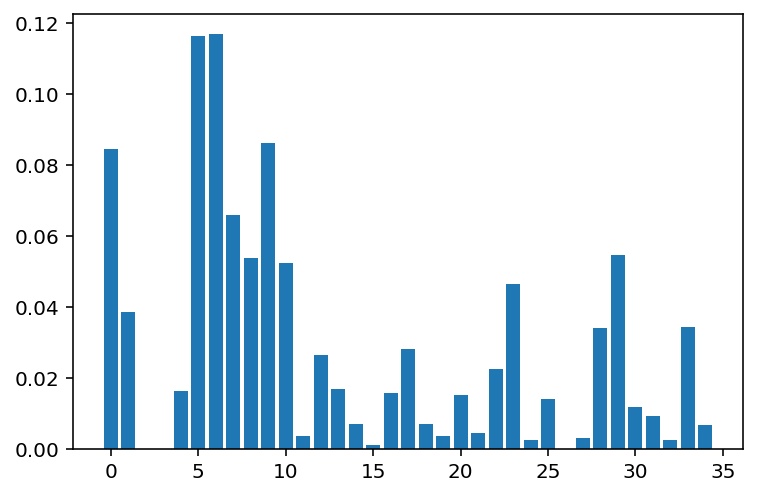

In [13]:
importance = RandomForestClassifier_soft.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Voting: Generating a Report table

Para comparar todos los modelos, creemos una tabla y un diagrama.

In [14]:
# Construcción de la tabla con los distintos medidores de rendimiento para usarlos en una tabla comparativa. 
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2))).transpose()


In [15]:
# Mostrar la Medición del rendimiento de los modelos en una tabla.
report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score', "Exhaustividad", "F1", "AUC"]
report_table.index = report_table['Model Name']
report_table.head(4)

,Model Name,Model Parameter,Training Score,Testing Score,Exhaustividad,F1,AUC
Model Name,,,,,,,
Hard Voting Classifier,Hard Voting Classifier,,1,0.979592,0.961538,0.980392,0.980769
Soft Voting Classifier,Soft Voting Classifier,,1,0.959184,0.961538,0.961538,0.95903


In [16]:
# guardamos los resultados
report_table.to_csv('Voting Classifiers With NearMiss.csv')

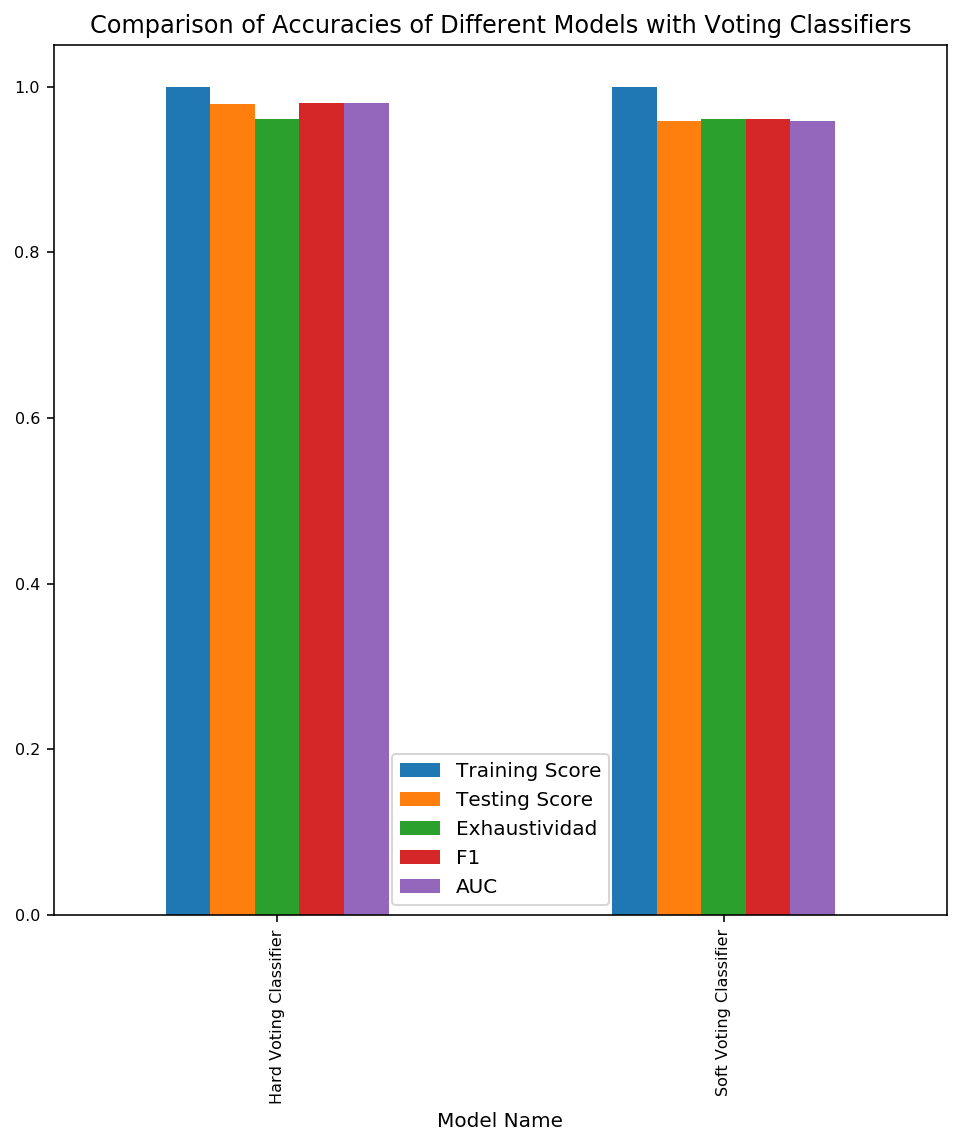

tornado.application - ERROR - Exception in callback functools.partial(<function Kernel.enter_eventloop.<locals>.advance_eventloop at 0x000001BE3D575708>)
Traceback (most recent call last):
  File "C:\Users\Hicham\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Hicham\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 314, in advance_eventloop
    eventloop(self)
TypeError: 'NoneType' object is not callable


In [17]:
ax = report_table[['Model Name', 'Model Parameter', 'Training Score', 'Testing Score', "Exhaustividad", "F1", "AUC"]].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models with Voting Classifiers", figsize=(8, 8), fontsize = 8)
plt.show()